In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Iris Dataset

In [2]:
data = datasets.load_iris(return_X_y=False)

In [3]:
#Defining the PCA function using SVD
def tf_pca(x):
    # Center (standardization)
    x -= tf.reduce_mean(x, -2, keepdims=True)

    with tf.device('/cpu:0'):
        ss, us, vs = tf.linalg.svd(x, full_matrices=False, compute_uv=True) 
#In any singular value decomposition M = UΣV; the diagonal entries of Σ are equal to the singular values of M. The first p = min(m, n) columns of U and V are, respectively, left- and right-singular vectors for the corresponding singular values
    
    ss = tf.expand_dims(ss, -2)   #Returns a tensor with an additional dimension inserted at index axis 
    projected_data = us * ss

    # Selection of sign of axes is arbitrary.
    # This replicates sklearn's PCA by duplicating flip_svd
    r = projected_data
    abs_r = tf.abs(r) #Computes the absolute value of a tensor
    m = tf.equal(abs_r, tf.reduce_max(abs_r, axis=-2, keepdims=True)) #equal: Returns the truth value of (x == y) element-wise; reduce_max: Computes the maximum of elements across dimensions of a tensor
    signs = tf.sign(tf.reduce_sum(r * tf.cast(m, r.dtype), axis=-2, keepdims=True)) #sign:Returns an element-wise indication of the sign of a number; reduce_sum:Computes the sum of elements across dimensions of a tensor
    result = r * signs

    return result

In [4]:
#defining the tensor for the data
pca_data = tf.constant(np.reshape(data.data,(data.data.shape[0],-1)),dtype=tf.float32)

In [5]:
pca_data.shape

TensorShape([150, 4])

In [6]:
#calling the defined function on the tensor
pca_data=tf_pca(pca_data)

In [7]:
#calculating mean & variance along different components 
mean, var = tf.nn.moments(pca_data, axes=[0], shift=None, keepdims=False, name=None)

In [8]:
#ratio of explained variance for every component
var = [i/sum(var) for i in var]

In [9]:
var

[<tf.Tensor: shape=(), dtype=float32, numpy=0.9246187>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.053066462>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.017102595>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.005212177>]

Scree Plot

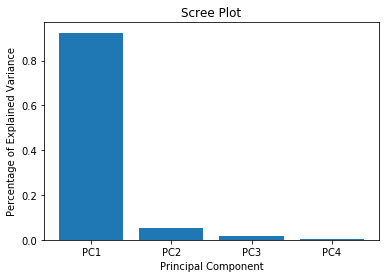

In [10]:
labels = ['PC' + str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height=var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# Wine Dataset

In [11]:
data = datasets.load_wine(return_X_y=False)

In [18]:
def tf_pca(x):
    '''
        Compute PCA on the bottom two dimensions of x,
        eg assuming dims = [..., observations, features]
    '''
    # Center (standardization)
    x -= tf.reduce_mean(x, -2, keepdims=True)

    with tf.device('/cpu:0'):
        ss, us, vs = tf.linalg.svd(x, full_matrices=False, compute_uv=True) 
#In any singular value decomposition M = UΣV; the diagonal entries of Σ are equal to the singular values of M. The first p = min(m, n) columns of U and V are, respectively, left- and right-singular vectors for the corresponding singular values
    ss = tf.expand_dims(ss, -2)    
    projected_data = us * ss

    # Selection of sign of axes is arbitrary.
    # This replicates sklearn's PCA by duplicating flip_svd
    r = projected_data
    abs_r = tf.abs(r)
    m = tf.equal(abs_r, tf.reduce_max(abs_r, axis=-2, keepdims=True))
    signs = tf.sign(tf.reduce_sum(r * tf.cast(m, r.dtype), axis=-2, keepdims=True))
    result = r * signs

    return result

In [19]:
pca_data = tf.constant(np.reshape(data.data,(data.data.shape[0],-1)),dtype=tf.float32)

In [20]:
pca_data.shape

TensorShape([178, 13])

In [21]:
pca_data=tf_pca(pca_data)

In [22]:
mean, var = tf.nn.moments(pca_data, axes=[0], shift=None, keepdims=False, name=None)
var = [i/sum(var) for i in var]
var

[<tf.Tensor: shape=(), dtype=float32, numpy=0.99809134>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0017359122>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.4959e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.021729e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.2363692e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.462127e-06>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.806812e-06>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5230806e-06>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.1278271e-06>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.2141665e-07>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.7806007e-07>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.1201376e-07>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.2539124e-08>]

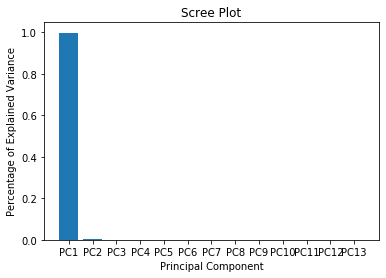

In [23]:
labels = ['PC' + str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height=var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()